In [1112]:
import argparse
import numpy as np
import random
from PIL import Image, ImageFilter
import os
import time
import matplotlib.pyplot as plt

In [1188]:
def random_walk(canvas, ini_x, ini_y, length, momentum):
    img_size = canvas.shape[-1]
    x_list = []
    y_list = []
    x2 = ini_x
    y2 = ini_y
    direction=0
    for i in range(length):
        if i % 1500 == 0:
            x = random.randint(0, 256 - 1)
            y = random.randint(0, 256 - 1)
            xsign = random.randint(0, 1)
            ysign = random.randint(0, 1)
            inirand = np.random.rand()*2*np.pi
            xdir = np.cos(inirand)
            ydir = np.sin(inirand)

        currand = np.sqrt(np.random.rand()*np.random.rand())*2*np.pi
        direction = direction*0.8 + currand *2*np.pi*(1-0.8)
        xdir = xdir*momentum + np.cos(currand)*(1-momentum)*(2*xsign-1)
        ydir = ydir*momentum + np.sin(currand)*(1-momentum)*(2*ysign-1)
        x = np.clip(x + xdir, a_min=0, a_max=img_size - 1)
        y = np.clip(y + ydir, a_min=0, a_max=img_size - 1)
        x2 = np.clip(x2 + np.cos(direction), a_min=0, a_max=img_size - 1)
        y2 = np.clip(y2 + np.sin(direction), a_min=0, a_max=img_size - 1)
        x_list.append(int(x))
        y_list.append(int(y))
        x_list.append(int(x2))
        y_list.append(int(y2))
    canvas[np.array(x_list), np.array(y_list)] = 1
    return canvas

In [1189]:
def blur(img, blurradius=5):    
    out = Image.blend(img, img.filter(ImageFilter.GaussianBlur(blurradius)),1)
    return out

In [1251]:
def vignette(size, params=[]):
    valx = []
    valy = []
    for x in range(size):
        if x < params[0]:
            valx.append((params[0]-x) / params[0])
        elif size-x < params[2]:
            valx.append((params[2]-(size-x)+1) / params[2])  
        else:
            valx.append(0)         
    for y in range(size):
        if y < params[1]:
            valy.append((params[1]-y) / params[1])
        elif size-y < params[3]:
            valy.append((params[3]-(size-y)+1) / params[3])  
        else:
            valy.append(0) 
    return np.add.outer(valx,valy)-np.outer(valx,valy)

In [1253]:
start = time.time()
imgarray = []

for i in range(1000):
    vi1 = random.randint(1, 120)
    vi2 = random.randint(1, 120)
    vi3 = random.randint(1, 120)
    vi4 = random.randint(1, 120)
    canvas = vignette(512, [vi1,vi2,vi3,vi4])
    ini_x = random.randint(0, 512 - 1)
    ini_y = random.randint(0, 512 - 1)
    mask = random_walk(canvas, ini_x, ini_y, 7500, 0.992)
    dilatation = random.randint(1, 10)*2- 1
    color = random.randint(170, 255)
    blurradius = random.randint(1, 20)
    img = blur(Image.fromarray(mask * color).convert('L').resize((1024,1024), Image.BICUBIC).filter(ImageFilter.MaxFilter(dilatation)),blurradius)    
    img.save('{:s}/{:06d}.jpg'.format("masks", i))
end = time.time()
(end - start)

426.800977230072

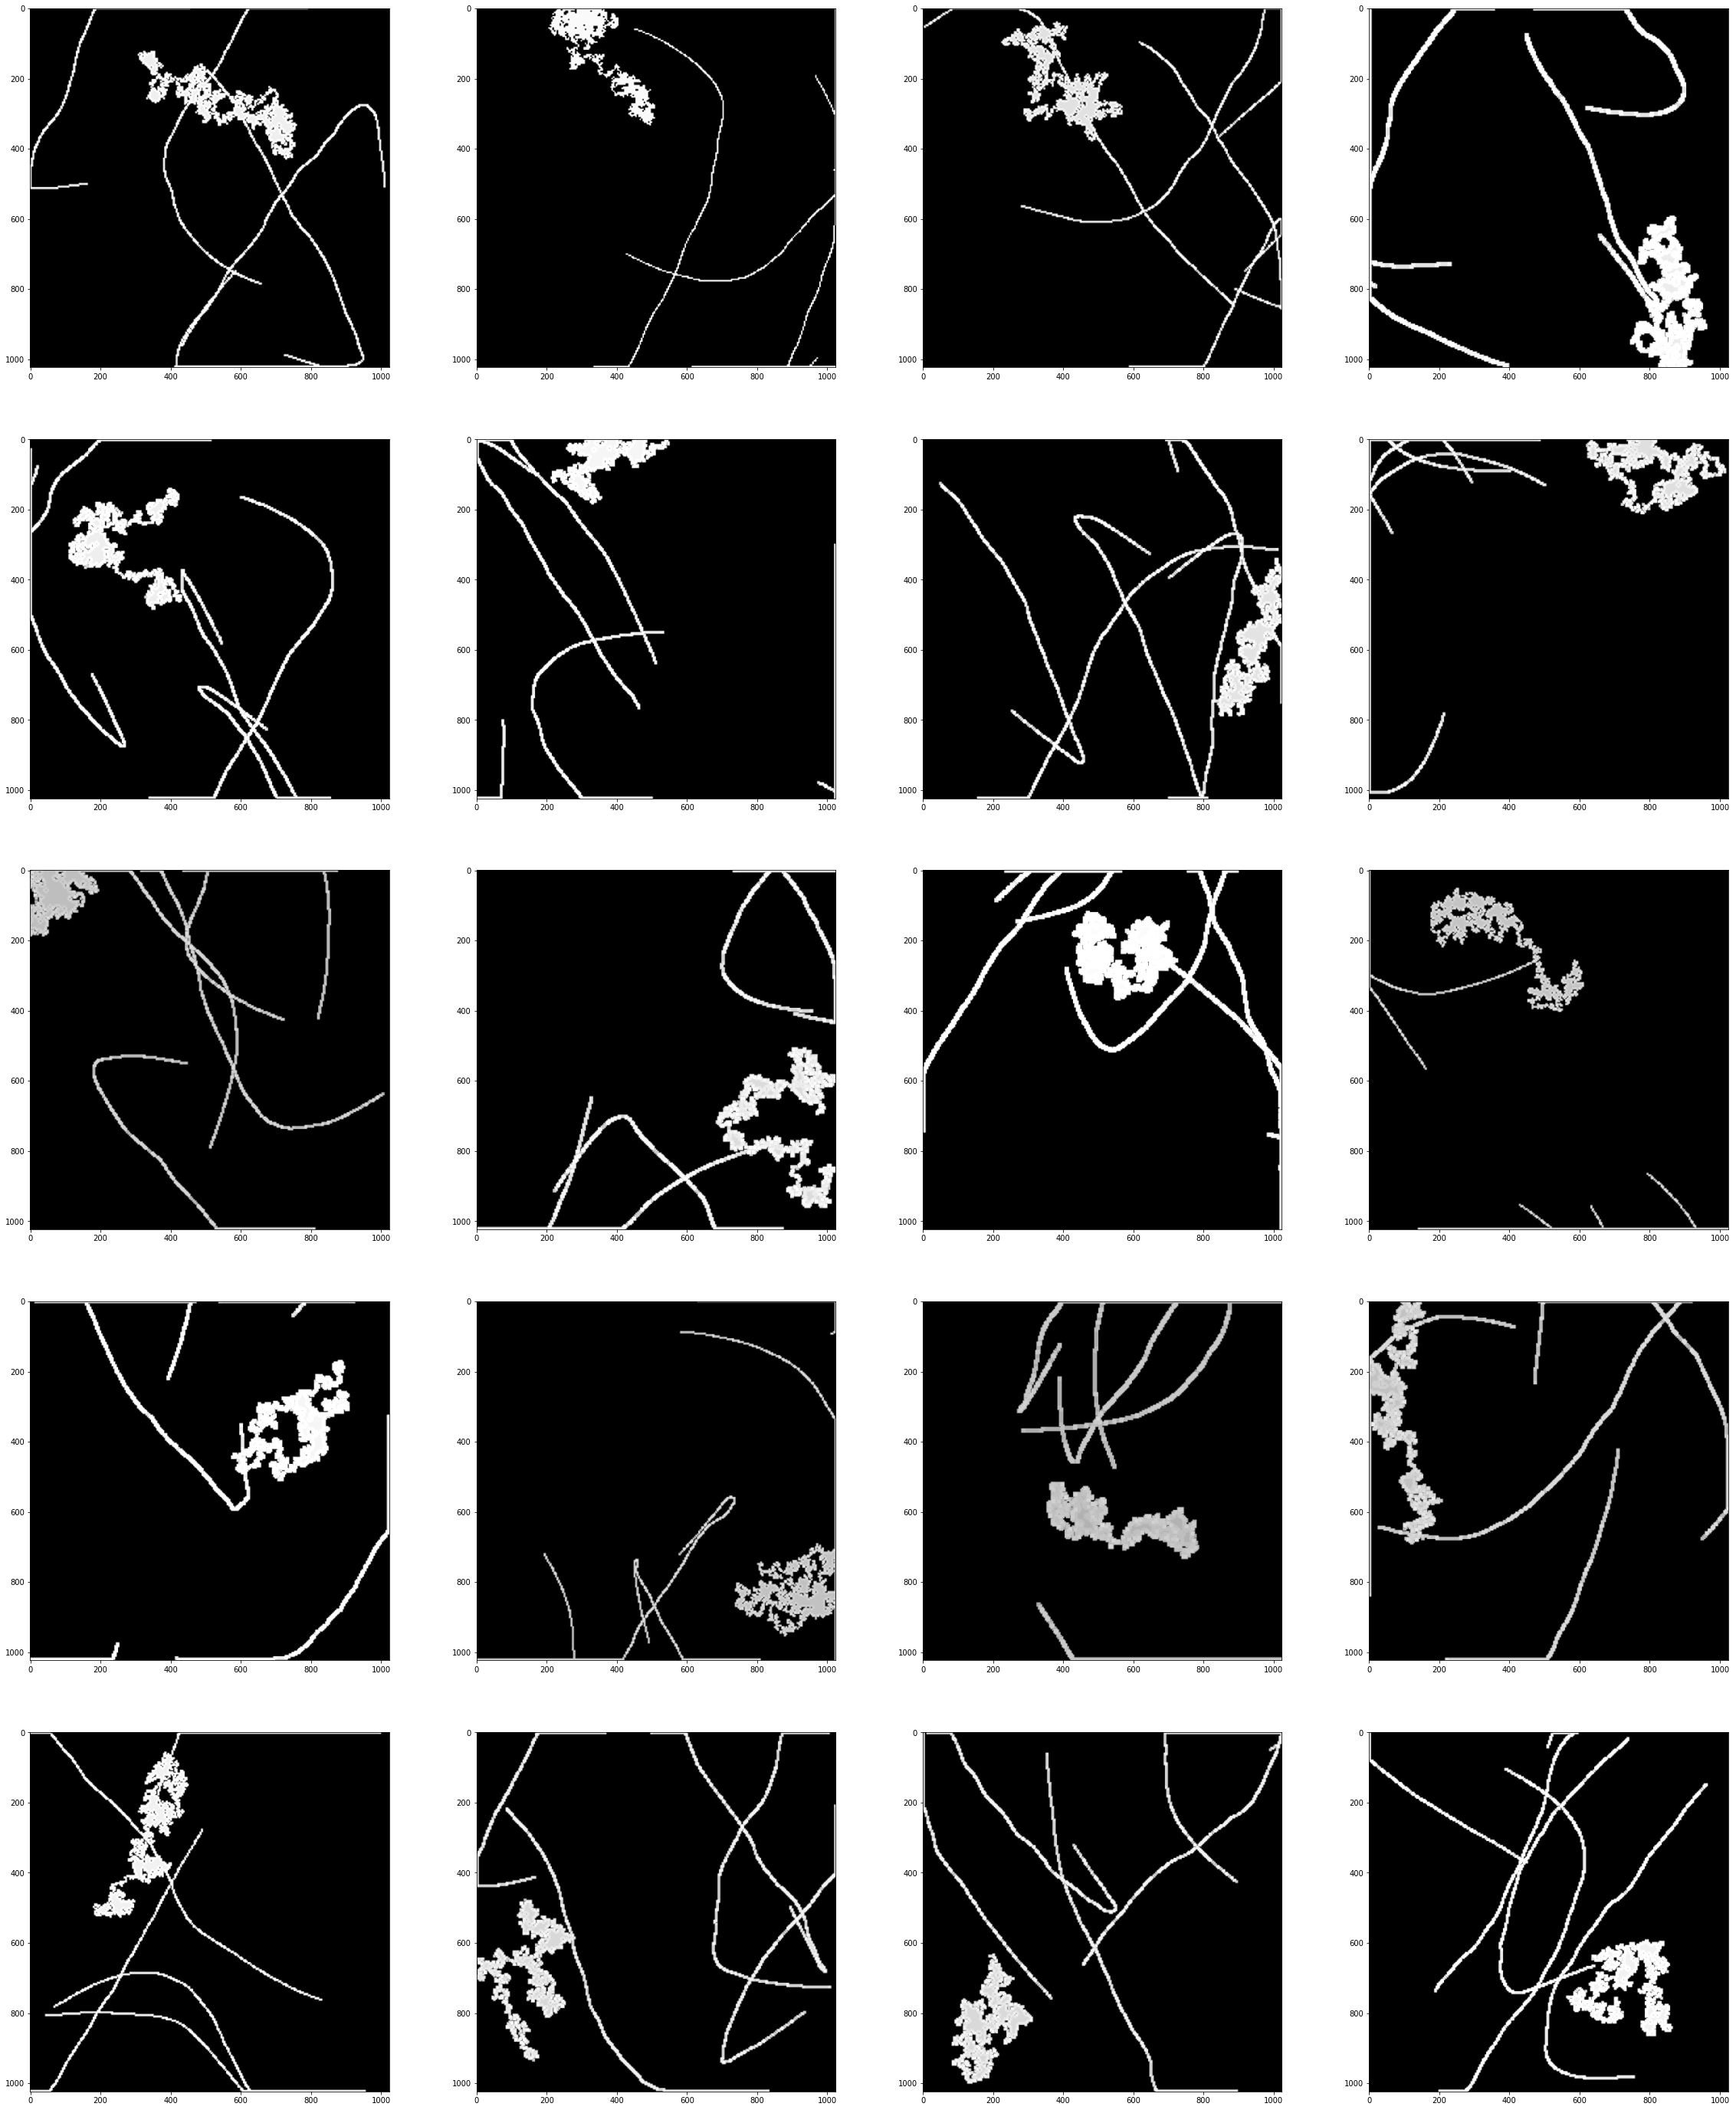

In [1177]:
f, axarr = plt.subplots(5, 4, figsize=(40,50))
axarr = axarr.ravel()
for i in range(20):
    axarr[i].imshow(imgarray[i])
plt.show()

In [1241]:
vignette(512, [50,20,30,100]).astype("i")

array([[255, 248, 242, ..., 252, 253, 255],
       [252, 246, 239, ..., 249, 251, 252],
       [249, 243, 237, ..., 247, 248, 249],
       ...,
       [246, 240, 233, ..., 243, 245, 246],
       [250, 244, 238, ..., 248, 249, 250],
       [255, 248, 242, ..., 252, 253, 255]], dtype=int32)